In [65]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [66]:
iris = datasets.load_iris()

In [67]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [68]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [70]:
df["species"] = iris.target
df["species_name"] = df["species"].apply(lambda x: iris.target_names[x])

In [71]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [73]:
df = df.drop("species", axis = 1)

In [74]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
y_codigos, y_rotulos = df["species_name"].factorize()

df["species_name"] = y_codigos

In [76]:
df.head(), df.tail()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1                1.5               0.2   
 4                5.0               3.6                1.4               0.2   
 
    species_name  
 0             0  
 1             0  
 2             0  
 3             0  
 4             0  ,
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 145                6.7               3.0                5.2               2.3   
 146                6.3               2.5                5.0               1.9   
 147                6.5               3.0                5.2               2.0   
 148                6.2               3.4                5.4               

In [77]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)

In [78]:
len(df_train), len(df_test)

(112, 38)

In [79]:
y_train = df_train.species_name.values
y_test = df_test.species_name.values

In [80]:
del df_train["species_name"]
del df_test["species_name"]

In [81]:
X_train = df_train.values
X_train[0]

array([5.9, 3. , 4.2, 1.5])

In [82]:
#Treinando o modelo
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
X_test = df_test.values

In [83]:
#Validando
y_pred= model.predict(X_test)

In [84]:
#Precisão
(y_test == y_pred).mean()

0.9736842105263158

In [85]:
#Testando em Iris qualquer
X_iris = df_test.iloc[[5]].values

In [86]:
X_iris

array([[6.3, 3.3, 6. , 2.5]])

In [87]:
y_iris_pred= model.predict(X_iris)

In [88]:
# Nossa predição/valor real
y_iris_pred, y_test[5]

(array([2]), 2)

Usando Árvores de Decisão:

In [96]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [97]:
y_pred = dt.predict(X_train)
y_pred_test= dt.predict(X_test)

print("Train: ",(y_train == y_pred).mean())
print("Test: ",(y_test == y_pred_test).mean())

Train:  0.9821428571428571
Test:  0.9736842105263158


[Text(0.375, 0.875, 'x[2] <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'x[2] <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

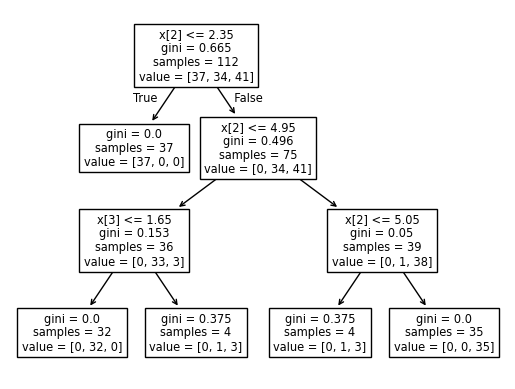

In [99]:
dt_train= dt.fit(X_train, y_train)

plot_tree(dt_train)

In [100]:
X_train[2]

array([6.8, 3. , 5.5, 2.1])

In [101]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

y_proba = dt.predict_proba(X_test)

roc_auc = roc_auc_score(
    y_test,
    y_proba,
    multi_class='ovr',     # Usa a estratégia One-vs-Rest
    average='weighted'     # Pondera pelo suporte de cada classe
)

print(f"\nROC AUC Score (Multi-Classe, Teste): {roc_auc:.4f}")



ROC AUC Score (Multi-Classe, Teste): 0.9796


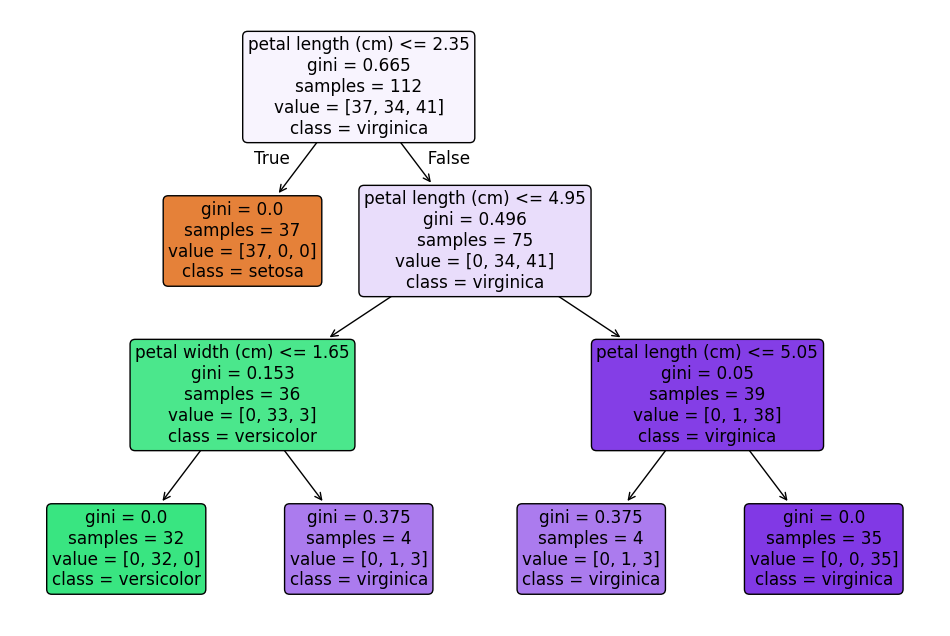

In [102]:
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()